# Import Library

In [1]:
import numpy as np
import pandas as pd

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# for model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Evaluasi Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve

# Import Data

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# EDA

### Information of dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Deskripsi statistik

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


### Check Missing Value

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.target.unique()

array([0, 1], dtype=int64)

### Check Duplicated data

In [7]:
df.duplicated().sum()

723

In [8]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


### Check Imbalance

In [11]:
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

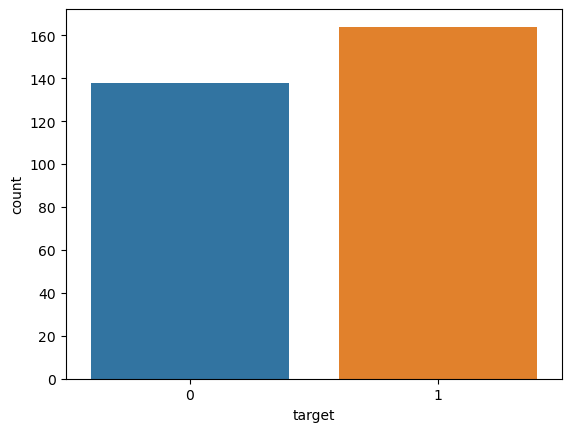

In [12]:
sns.countplot(x = df.target)
plt.show()

In [13]:
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

# Splitting

In [14]:
X = df.drop(columns='target')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((241, 13), (61, 13), (241,), (61,))

In [15]:
print("Jumlah data training:", len(X_train))
print("Jumlah data test:", len(X_test))

Jumlah data training: 241
Jumlah data test: 61


In [16]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [17]:
y_train

163    0
291    0
280    1
85     1
239    0
      ..
267    0
77     0
125    1
522    1
119    1
Name: target, Length: 241, dtype: int64

In [18]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
163,48,1,0,124,274,0,0,166,0,0.5,1,0,3
291,58,1,0,128,259,0,0,130,1,3.0,1,2,3
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2
85,44,1,1,120,220,0,1,170,0,0.0,2,0,2
239,62,0,0,150,244,0,1,154,1,1.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,67,1,0,120,237,0,1,71,0,1.0,1,0,2
77,63,1,0,140,187,0,0,144,1,4.0,2,2,3
125,60,0,3,150,240,0,1,171,0,0.9,2,0,2
522,67,0,2,152,277,0,1,172,0,0.0,2,1,2


# Scaling

In [19]:
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train[columns])
X_test_scale = scaler.transform(X_test[columns])

In [20]:
X_train[columns]=X_train_scale
X_test[columns]=X_test_scale

In [21]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
163,-0.682633,1,0,-0.403153,0.486281,0,0,0.717007,0,-0.447524,1,0,3
291,0.403989,1,0,-0.171406,0.206315,0,0,-0.836627,1,1.768032,1,2,3
280,-1.008619,0,1,-0.055533,-0.260295,0,0,1.105415,0,-0.358902,1,0,2
85,-1.117282,1,1,-0.634899,-0.521596,0,1,0.889633,0,-0.890635,2,0,2
239,0.838637,0,0,1.103201,-0.073651,0,1,0.199129,1,0.350076,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.381948,1,0,-0.634899,-0.204301,0,1,-3.382861,0,-0.004413,1,0,2
77,0.947300,1,0,0.523834,-1.137521,0,0,-0.232436,1,2.654254,2,2,3
125,0.621313,0,3,1.103201,-0.148308,0,1,0.932789,0,-0.093035,2,0,2
522,1.381948,0,2,1.219074,0.542274,0,1,0.975946,0,-0.890635,2,1,2


### Cross Validation

In [22]:
# Membuat model
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [23]:
# Melakukan cross-validation dan evaluasi model
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name}:")
    print("Cross-validation scores:", scores)
    print("Mean accuracy:", scores.mean())
    print()

Logistic Regression:
Cross-validation scores: [0.87755102 0.83333333 0.79166667 0.83333333 0.8125    ]
Mean accuracy: 0.8296768707482993

Random Forest:
Cross-validation scores: [0.75510204 0.79166667 0.83333333 0.77083333 0.79166667]
Mean accuracy: 0.7885204081632653

Support Vector Machine:
Cross-validation scores: [0.7755102  0.8125     0.8125     0.83333333 0.83333333]
Mean accuracy: 0.8134353741496598

K-Nearest Neighbors:
Cross-validation scores: [0.7755102  0.8125     0.8125     0.8125     0.77083333]
Mean accuracy: 0.7967687074829932



### Model

In [24]:
# Memilih model terbaik untuk pengujian lebih lanjut
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = lr_model.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [26]:
# Evaluasi model terbaik
print("Evaluation of the best model:")
print("Accuracy:", accuracy_score(y_test, y_pred))

Evaluation of the best model:
Accuracy: 0.7868852459016393


In [27]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm

Confusion Matrix:


array([[22, 10],
       [ 3, 26]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Model')

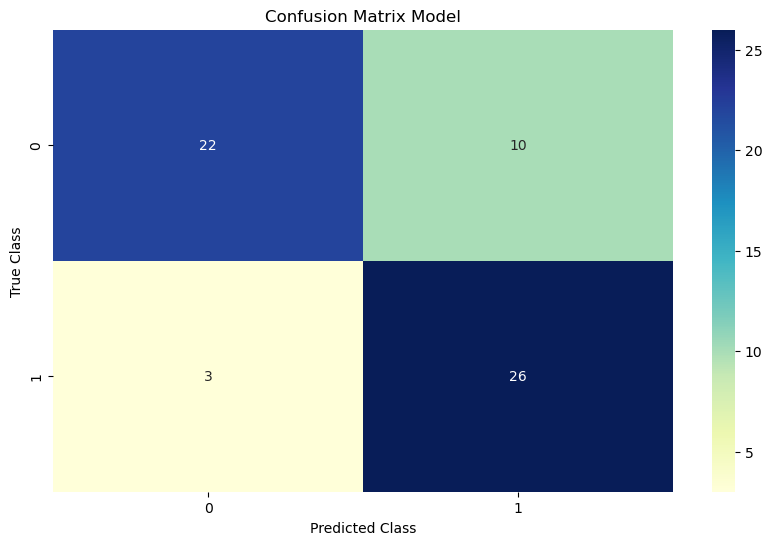

In [28]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt = "d", cmap= 'YlGnBu')

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")

In [29]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.69      0.77        32
           1       0.72      0.90      0.80        29

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



In [30]:
train_sizes, train_scores, test_scores = learning_curve(lr_model, X_train, y_train, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

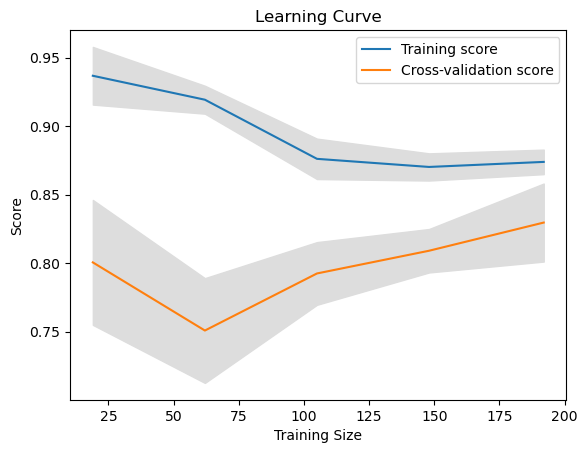

In [31]:
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()

### Hyperparameter tuning

In [32]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Melakukan Grid Search untuk hyperparameter tuning
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01

C:\Users\arifs\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\arifs\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\arifs\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\arifs\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
V

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=2)

In [33]:
# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'C': 0.1, 'penalty': 'l2'}


### Find Tuning Model

In [34]:
# Memilih model terbaik untuk pengujian lebih lanjut
lr_model_tune = LogisticRegression(C=0.1, penalty='l2')
lr_model_tune.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [35]:
y_pred_tune = lr_model_tune.predict(X_test)
y_pred_tune

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [36]:
# Evaluasi model terbaik
print("Evaluation of the best model after hyperparameter tuning:")
print("Accuracy:", accuracy_score(y_test, y_pred_tune))

Evaluation of the best model after hyperparameter tuning:
Accuracy: 0.8360655737704918


In [37]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_tune)
cm

Confusion Matrix:


array([[24,  8],
       [ 2, 27]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Model')

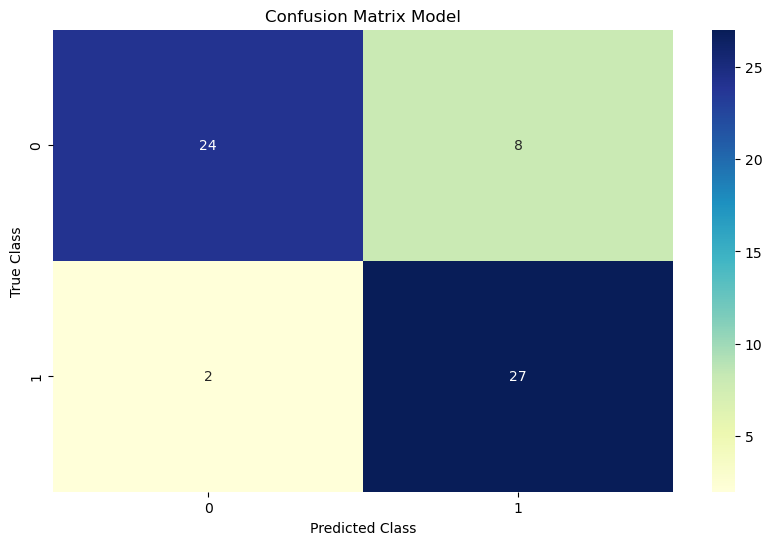

In [38]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt = "d", cmap= 'YlGnBu')

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")

In [39]:
print("Classification Report:")
print(classification_report(y_test, y_pred_tune))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        32
           1       0.77      0.93      0.84        29

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



In [40]:
train_sizes, train_scores, test_scores = learning_curve(lr_model_tune, X_train, y_train, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

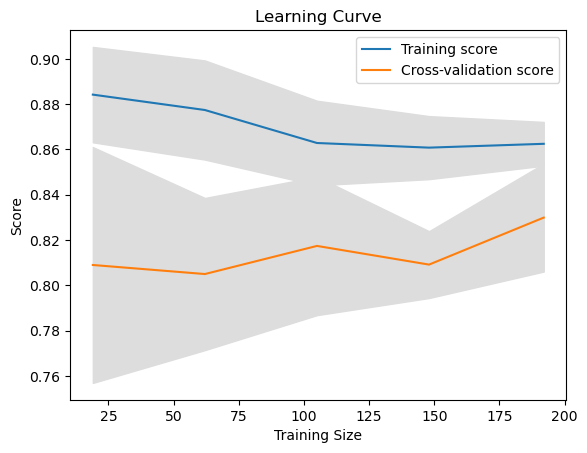

In [41]:
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()